In [17]:
import numpy as np
import pandas as pd
import pandas_datareader as data

import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

In [18]:
start = '2002-09-01'
end = '2022-07-24'

df = data.DataReader('TCS.NS','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-09-02,45.974998,44.049999,44.750000,44.500000,2389568.0,32.660091
2002-09-03,44.937500,42.000000,44.750000,42.412498,986784.0,31.128025
2002-09-04,43.750000,41.387501,41.875000,43.337502,1449856.0,31.806911
2002-09-05,44.862499,42.500000,44.662498,43.075001,1061360.0,31.614265
2002-09-06,43.250000,41.012501,43.250000,41.474998,907472.0,30.439960


<AxesSubplot:xlabel='Date', ylabel='Close'>

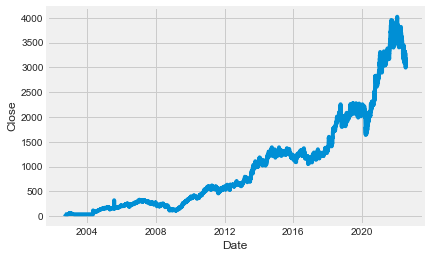

In [19]:
sns.lineplot(x=df.index ,y='Close', data=df)

<AxesSubplot:xlabel='Date', ylabel='Volume'>

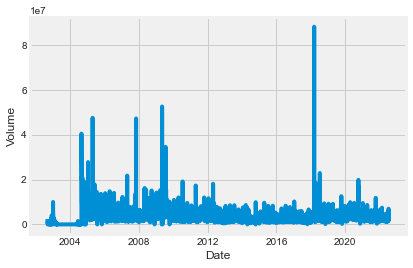

In [20]:
sns.lineplot(x=df.index ,y='Volume', data=df)

In [21]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

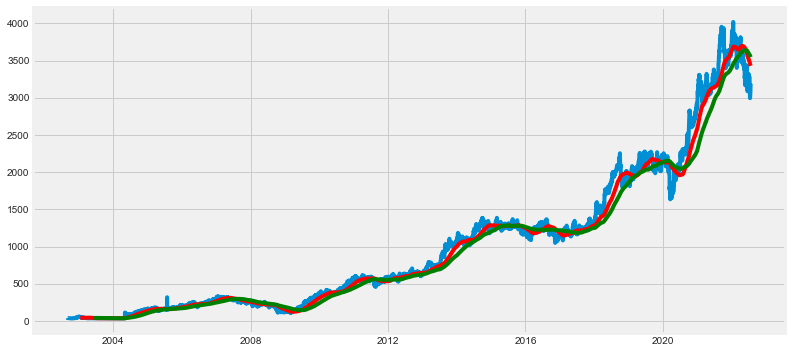

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [7]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4695

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00217157],
       [0.0016475 ],
       [0.00187972],
       ...,
       [0.78551707],
       [0.78865517],
       [0.78707355]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([2.17156672e-03, 1.64750337e-03, 1.87972365e-03, 1.81382333e-03,
       1.41214574e-03, 1.27720775e-03, 1.27720775e-03, 1.53766981e-03,
       1.59101792e-03, 1.28975997e-03, 1.08892166e-03, 1.38390302e-03,
       1.06381723e-03, 9.79088098e-04, 8.15906429e-04, 6.49587425e-04,
       3.23225045e-04, 3.95400999e-04, 5.42892160e-04, 6.59001346e-04,
       3.07534536e-04, 2.29081995e-04, 2.29081995e-04, 4.76991834e-04,
       4.17368094e-04, 3.76572198e-04, 6.30758623e-04, 3.85987078e-04,
       3.95400999e-04, 5.93101978e-04, 5.24063359e-04, 5.24063359e-04,
       5.42892160e-04, 5.42892160e-04, 7.43730474e-04, 8.94358970e-04,
       5.36615574e-04, 4.92682342e-04, 3.26363338e-04, 1.34938946e-04,
       0.00000000e+00, 7.84525412e-05, 2.32220288e-04, 3.76572198e-04,
       2.79291813e-04, 3.48329475e-04, 2.47910796e-04, 2.47910796e-04,
       5.33477280e-04, 3.67158276e-04, 2.25943702e-04, 2.73015227e-04,
       1.94562685e-04, 3.20086751e-04, 5.20925065e-04, 6.18206408e-04,
     

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4635/4635 [==============================] - 75s 15ms/step - loss: 4.7505e-04


In [14]:
model.save('stock_prediction_model1.h5')

In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 0s 29ms/step


312.5369167396736

C:\Users\aayus\AppData\Local\Temp\ipykernel_5456\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


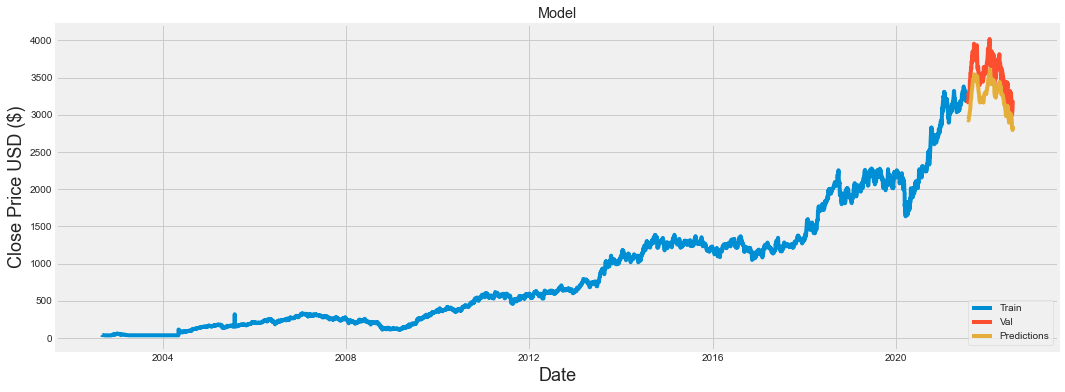

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()